In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


NEWTON RAPHSON

El método de Newton Raphson es usado para hallar las raices de una función f(x). La idea es que las raices serán los puntos de convergencia de la sucesión:

x_{n+1} = x_n - f(x_n)/f'(x_n)

Donde f(x_n) y f'(x_n) denotan la función f y su derivada f' evaluadas en el punto x_n. Esta sucesion se toma de esta manera pues para una función monótona el valor de f(x_n)/f'(x_n) se vuelve cada vez más pequeño conforme n crece. La sucesion se construye así pues es el equivalente de hallar el punto que cortaría con el eje-x (x_n+1) al extender la aproximación lineal de la funcion en el punto actual x_n.

In [ ]:
#Al trabajar recuerde siempre separar la manipulacion de datos y los comandos para graficar sus resultados.

In [5]:
diferencia = 0.0001
explorer = 0
#definicion de nuestra funcion y su derivada
def f(x):
    return (x+2)*(x-2)*(x-4)
def der_f(x):
    return 3*x**2 - 8*x -4

#funcion que genera una lista con la sucecion de numeros hasta que converge a un error menor del pedido.
#Retorna el arreglo con todos los valores de la sucesion.
def busqueda(init, abuscar):
    explorer = 0
    travel = []
    while abs(explorer-abuscar)>=diferencia:
        explorer += -f(explorer)/der_f(explorer)
        travel.append(explorer)
    return travel


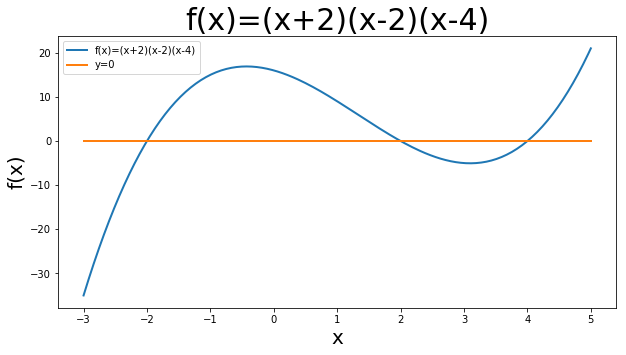

In [6]:
pruebax = linspace(-3, 5, 200)
pruebay = f(pruebax)
cero_line = zeros(200)
#aquí vemos la funcion f

fig = plt.figure(figsize=(10,5))
plt.plot(pruebax,pruebay,label='f(x)=(x+2)(x-2)(x-4)',linewidth=2)
plt.plot(pruebax,cero_line,label='y=0',linewidth=2)
plt.xlabel('x' , fontsize = 20)
plt.ylabel('f(x)', fontsize = 20)
plt.title('f(x)=(x+2)(x-2)(x-4)', fontsize = 30)
plt.legend()
plt.show()       
    


Ahora para ver como funciona el metodo vamos a hallar las 3 raices de nuestro polinomio. Notese que dependiendo de donde se ubique el punto inicial,
el valor de convergencia será diferente.

In [ ]:
init_a = -3.0
init_b = 1.0
init_c = 5.0
#inicializamos las busquedas
busqueda_a = busqueda(init_a, -2.0)
bxa = linspace(1, len(busqueda_a), len(busqueda_a))
busqueda_b = busqueda(init_b, 2)
bxb = linspace(1, len(busqueda_b), len(busqueda_b))
busqueda_c = busqueda(init_c, 4)
bxc = linspace(1, len(busqueda_c), len(busqueda_c))


In [ ]:

fig = plt.figure(figsize=(10,5))
plt.plot(bxa,busqueda_a,label='Convergencia a -2',linewidth=2)
plt.plot(bxb,busqueda_b,label='Convergencia a 2',linewidth=2)
plt.plot(bxc,busqueda_c,label='Convergencia a 4',linewidth=2)
plt.xlabel('n' , fontsize = 20)
plt.ylabel('x_n', fontsize = 20)
plt.title('sucesiones de la busqueda de raices', fontsize = 30)
plt.legend()
plt.show()  

MINIMOS CUADRADOS

Vamos a hallar los valores de pendiente e intersecto de una recta que más se ajustan por medio de minimos cuadrados para un conjunto de puntos. Para entender el funcionamiento de este método es importante estar familiarizados con algebra lineal, enfatizando en descomposicion de Cholesky.



0.05418223801659794
0.17160479271370832
-0.22326142974096097
-0.6580140583008136
1.0160690435290025
0.5373187257760867
1.2352015156614837
1.4286401705950715
0.8600085532252626
-0.2567031407640825


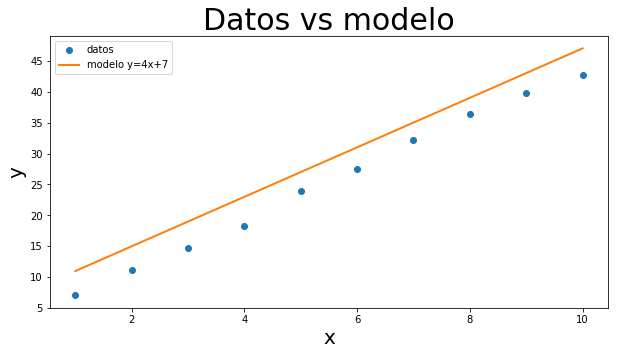

In [29]:
# En el siguiente procedimiento hallaremos ao y a1 por medio de minimos cuadrados, valores del sistema de ecuaciones formado por:
# F[i] = ao*theta[i] + a1 ------> ao es la pendiente y a1 el intersecto

#El sistema debería ser y = 4x + 7
#construimos nuestros datos
num = 10
theta = []
F=[]
for i in range(num):
    alea = 3*random.rand()-1.5
    theta.append(4*i+7+alea)
    F.append(4*i+7)
    print(str(alea))
    
ejex = linspace(1,num, num)

fig = plt.figure(figsize=(10,5))
plt.plot(ejex, theta, "o", label='datos',linewidth=2)
plt.plot(ejex, ejex*4 +7, label='modelo y=4x+7', linewidth=2)
plt.xlabel('x' , fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Datos vs modelo', fontsize = 30)
plt.legend()
plt.show()       



In [30]:



#Creamos las matrices A y A transpuesta a partir de los datos del tiempo
At = zeros((3,num))
A = zeros((num,3))
for i in range(num):
    for j in range(3):            
        A[i,j] = theta[i]**j
        At[j,i] = theta[i]**j
        
#Creamos la matriz Atranspuesta*A y a su vez el vector bprime que es Atranspuesta*y=bprime
AtxA = zeros((3,3))
bprime = zeros(3)
for i in range (3):
    for j in range(3):
        for n in range(num):
            AtxA[i,j] += At[i,n]*A[n,j]
                    
                    
for i in range(3):
    for n in range(num):
        bprime[i] += At[i,n]*F[n]

#Creamos constantes y las matrices triangular superior e inferior L y Ltranspuesta, donde L*Lt = At*A (descomposicion de Cholesky)
a = 0.0
s = 0.0
L = zeros((3,3))
Lt = zeros((3,3))

for i in range(3):
    for j in range(i+1): 
        if i==j:
            for n in range(i):        
                a += (L[i,n])**2  
            L[i,i] = (AtxA[i,i] - a)**0.5
            a = 0.0
        else:
            for n in range(j):    
                s += L[j,n]*L[i,n]  
            L[i,j] = (AtxA[i,j] - s)/L[j,j]
            s = 0.0
            
for i in range(3):
    for j in range(3):
        Lt[j,i] = L[i,j]

#Creamos el vector z, donde L*(z)=bprime y resolvemos el sistema        
z = zeros(3)       
for i in range(3):
    k = 0.0
    for j in range(i):
        k += z[j]*L[i,j]
    z[i] = (bprime[i] - k)/L[i,i]

#Resolvemos el sistema para el vector x, donde Lt*x = z
x = zeros(3)
h = 0.0

for i in range(3):
    for j in range(3-i,3):
        h += x[j]*Lt[2-i,j]
    x[2-i] = (z[2-i]-h)/Lt[2-i,2-i]
    h = 0.0

print('Intersecto hallado ='+str(x[0]))
print('Pendiente hallada ='+str(x[1]))
#quise tambien tomar en cuenta un término cuadratico para ver que tal le quedaba a los puntos.
print('Indice cuadrático (debería ser cercano a cero) ='+str(x[2]))

Intersecto hallado =1.101765307192835
Pendiente hallada =0.8859063061370652
Indice cuadrático (debería ser cercano a cero) =0.0017608016767555743


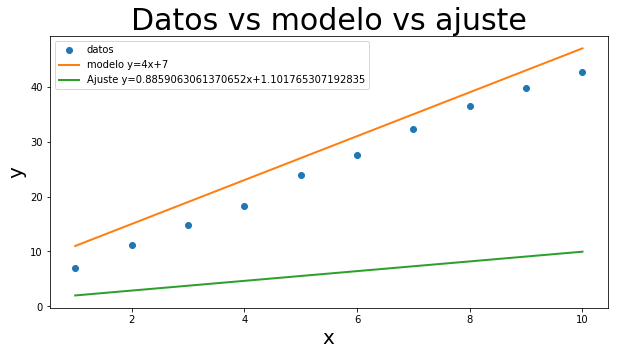

In [31]:
#Aquí probamos como quedó el ajuste

fig = plt.figure(figsize=(10,5))
plt.plot(ejex, theta, "o", label='datos',linewidth=2)
plt.plot(ejex, ejex*4+7, label='modelo y=4x+7', linewidth=2)
plt.plot(ejex, ejex*x[1]+x[0], label='Ajuste y='+str(x[1])+'x+'+str(x[0]), linewidth=2)
plt.xlabel('x' , fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Datos vs modelo vs ajuste', fontsize = 30)
plt.legend()
plt.show()   